In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

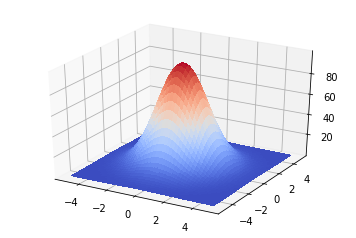

0.36787944117144233

In [175]:
X = np.linspace(-5,5)
Y = np.linspace(-5,5)
X, Y = np.meshgrid(X, Y)

Z = 100*np.exp(-1*(X**2 + Y**2)/5)

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

X1 = X.reshape(-1,1)
Y1 = Y.reshape(-1,1)
Z1 = Z.reshape(-1,1)

np.exp(-1)

In [155]:
def plot3d(x, y, z):
    l = int(np.sqrt(x.shape[0]))
    x1 = x.reshape(l,l)
    y1 = y.reshape(l,l)
    z1 = z.reshape(l,l)
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

    surf = ax.plot_surface(x1, y1, z1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    plt.show()
   # ax.set_zlim(-1.01, 1.01)

    X1 = X.reshape(-1,1)
    Y1 = Y.reshape(-1,1)
    Z1 = Z.reshape(-1,1)

In [106]:
def model_fn(features, labels, mode, params={}):
    # b -- batch size
    X = features['X'] # b x 1
    Y = features['Y'] # b x 1
    
    # labels -- b x 1
    
    inputs = tf.concat([X,Y], axis = 1) # b x 2
    
    p = params.get("p", 1)
    
    # Layer 1
    w = tf.get_variable("w", shape=[2, p], dtype=tf.float64) # 2 x p
    b = tf.get_variable("b", shape=[1, p], dtype=tf.float64) # 1 x p
    
    out1 = b + tf.matmul(inputs, w) # b x p
    # Hidden layer
    out2 = tf.nn.relu(out1) # b x p
    
    # Final transformation
    
    w_outer = tf.get_variable("w_outer", shape=[p, 1], dtype=tf.float64) # p x 1
    b_outer = tf.get_variable("b_outer", shape=[1, 1], dtype=tf.float64) # 1 x 1

    out3 = tf.matmul(out2, w_outer)  + b_outer# b x 1
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode = mode,
            predictions = out3,
            loss = None,
            train_op = None
        )
    
    loss = tf.losses.mean_squared_error(labels, out3)
    learning_rate = 1e-5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    global_step = tf.train.get_global_step()
    train_op = tf.group(optimizer, tf.assign_add(global_step, 1))
    return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = out3,
        loss = loss,
        train_op = train_op
    )

# Shape experiments trial

In [107]:
npa = np.array(range(1,5), dtype=np.float32).reshape(-1,1)
npb = npa + 2

a = tf.constant(npa)
b = tf.constant(npb)

tf.matmul(tf.transpose(a),b)

tf.concat([npa, npb],axis=1)

<tf.Tensor 'concat_7:0' shape=(4, 2) dtype=float32>

In [186]:
estimator = tf.estimator.Estimator(model_fn=model_fn, params={"p": 10})
input_fn = tf.estimator.inputs.numpy_input_fn({"X": X1, "Y":Y1}, y=Z1, batch_size=5, num_epochs=100, shuffle=True)
predict_input_fn = tf.estimator.inputs.numpy_input_fn({"X": X1, "Y":Y1}, y=Z1, batch_size=5, num_epochs=1, shuffle=False)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x18196bef10>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmmOgAb', '_save_summary_steps': 100}


In [187]:
estimator.train(input_fn=input_fn)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmmOgAb/model.ckpt.
INFO:tensorflow:loss = 840.422, step = 1
INFO:tensorflow:global_step/sec: 817.34
INFO:tensorflow:loss = 2502.17, step = 101 (0.125 sec)
INFO:tensorflow:global_step/sec: 953.353
INFO:tensorflow:loss = 306.632, step = 201 (0.107 sec)
INFO:tensorflow:global_step/sec: 865.463
INFO:tensorflow:loss = 56.7411, step = 301 (0.121 sec)
INFO:tensorflow:global_step/sec: 608.058
INFO:tensorflow:loss = 243.678, step = 401 (0.169 sec)
INFO:tensorflow:global_step/sec: 482.504
INFO:tensorflow:loss = 1935.65, step = 501 (0.196 sec)
INFO:tensorflow:global_step/sec: 593.345
INFO:tensorflow:loss = 7.28416, step = 601 (0.167 sec)
INFO:tensorflow:global_step/sec: 807.754
INFO:tensorflow:loss = 4.21718, step = 701 (0.123 sec)
INFO:tensorflow:global_step/sec: 863.745
INFO:tensorflow:loss = 1262.27, step = 801 (0.116 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 1225.24
INFO:tensorflow:loss = 2589.79, step = 8401 (0.081 sec)
INFO:tensorflow:global_step/sec: 1160.31
INFO:tensorflow:loss = 1513.34, step = 8501 (0.086 sec)
INFO:tensorflow:global_step/sec: 1286.72
INFO:tensorflow:loss = 82.4353, step = 8601 (0.078 sec)
INFO:tensorflow:global_step/sec: 1314.36
INFO:tensorflow:loss = 79.9195, step = 8701 (0.077 sec)
INFO:tensorflow:global_step/sec: 1308.7
INFO:tensorflow:loss = 1071.94, step = 8801 (0.076 sec)
INFO:tensorflow:global_step/sec: 917.97
INFO:tensorflow:loss = 2530.74, step = 8901 (0.109 sec)
INFO:tensorflow:global_step/sec: 1041.32
INFO:tensorflow:loss = 1257.95, step = 9001 (0.096 sec)
INFO:tensorflow:global_step/sec: 1177.99
INFO:tensorflow:loss = 72.5414, step = 9101 (0.086 sec)
INFO:tensorflow:global_step/sec: 1154.96
INFO:tensorflow:loss = 199.731, step = 9201 (0.086 sec)
INFO:tensorflow:global_step/sec: 1169.82
INFO:tensorflow:loss = 101.404, step = 9301 (0.085 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:loss = 223.834, step = 16801 (0.080 sec)
INFO:tensorflow:global_step/sec: 1232.78
INFO:tensorflow:loss = 625.746, step = 16901 (0.080 sec)
INFO:tensorflow:global_step/sec: 1203.92
INFO:tensorflow:loss = 318.644, step = 17001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1269.47
INFO:tensorflow:loss = 76.6819, step = 17101 (0.079 sec)
INFO:tensorflow:global_step/sec: 1234.19
INFO:tensorflow:loss = 883.455, step = 17201 (0.081 sec)
INFO:tensorflow:global_step/sec: 1244.79
INFO:tensorflow:loss = 159.763, step = 17301 (0.080 sec)
INFO:tensorflow:global_step/sec: 1138.15
INFO:tensorflow:loss = 658.706, step = 17401 (0.088 sec)
INFO:tensorflow:global_step/sec: 1200.74
INFO:tensorflow:loss = 962.939, step = 17501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1111.88
INFO:tensorflow:loss = 50.973, step = 17601 (0.090 sec)
INFO:tensorflow:global_step/sec: 1330
INFO:tensorflow:loss = 72.3219, step = 17701 (0.075 sec)
INFO:tensorflow:global_step/sec: 1213.3
INFO:tensorflow:loss = 78

INFO:tensorflow:loss = 56.7889, step = 25201 (0.090 sec)
INFO:tensorflow:global_step/sec: 1189.72
INFO:tensorflow:loss = 40.8506, step = 25301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1182.86
INFO:tensorflow:loss = 73.9126, step = 25401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1250.31
INFO:tensorflow:loss = 529.196, step = 25501 (0.080 sec)
INFO:tensorflow:global_step/sec: 1211.68
INFO:tensorflow:loss = 97.8212, step = 25601 (0.083 sec)
INFO:tensorflow:global_step/sec: 1151.16
INFO:tensorflow:loss = 43.3025, step = 25701 (0.088 sec)
INFO:tensorflow:global_step/sec: 1163.55
INFO:tensorflow:loss = 15.1372, step = 25801 (0.085 sec)
INFO:tensorflow:global_step/sec: 989.825
INFO:tensorflow:loss = 34.9742, step = 25901 (0.102 sec)
INFO:tensorflow:global_step/sec: 1016.38
INFO:tensorflow:loss = 93.4128, step = 26001 (0.097 sec)
INFO:tensorflow:global_step/sec: 1345.3
INFO:tensorflow:loss = 554.769, step = 26101 (0.074 sec)
INFO:tensorflow:global_step/sec: 1270.81
INFO:tensorflow:loss 

INFO:tensorflow:loss = 100.021, step = 33601 (0.081 sec)
INFO:tensorflow:global_step/sec: 1278.02
INFO:tensorflow:loss = 47.7068, step = 33701 (0.078 sec)
INFO:tensorflow:global_step/sec: 1061.78
INFO:tensorflow:loss = 40.8783, step = 33801 (0.095 sec)
INFO:tensorflow:global_step/sec: 841.439
INFO:tensorflow:loss = 99.641, step = 33901 (0.118 sec)
INFO:tensorflow:global_step/sec: 989.883
INFO:tensorflow:loss = 330.98, step = 34001 (0.101 sec)
INFO:tensorflow:global_step/sec: 1174.86
INFO:tensorflow:loss = 201.212, step = 34101 (0.085 sec)
INFO:tensorflow:global_step/sec: 1205.99
INFO:tensorflow:loss = 77.9622, step = 34201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1052.54
INFO:tensorflow:loss = 226.984, step = 34301 (0.096 sec)
INFO:tensorflow:global_step/sec: 924.401
INFO:tensorflow:loss = 56.1052, step = 34401 (0.109 sec)
INFO:tensorflow:global_step/sec: 889.721
INFO:tensorflow:loss = 50.1183, step = 34501 (0.112 sec)
INFO:tensorflow:global_step/sec: 994.599
INFO:tensorflow:loss =

INFO:tensorflow:loss = 300.649, step = 42001 (0.115 sec)
INFO:tensorflow:global_step/sec: 858.486
INFO:tensorflow:loss = 69.1285, step = 42101 (0.117 sec)
INFO:tensorflow:global_step/sec: 940.178
INFO:tensorflow:loss = 22.3426, step = 42201 (0.105 sec)
INFO:tensorflow:global_step/sec: 1023.14
INFO:tensorflow:loss = 168.37, step = 42301 (0.097 sec)
INFO:tensorflow:global_step/sec: 1062.59
INFO:tensorflow:loss = 482.743, step = 42401 (0.095 sec)
INFO:tensorflow:global_step/sec: 1049.86
INFO:tensorflow:loss = 256.222, step = 42501 (0.094 sec)
INFO:tensorflow:global_step/sec: 1105.44
INFO:tensorflow:loss = 499.522, step = 42601 (0.090 sec)
INFO:tensorflow:global_step/sec: 1255.08
INFO:tensorflow:loss = 167.481, step = 42701 (0.081 sec)
INFO:tensorflow:global_step/sec: 1227.46
INFO:tensorflow:loss = 25.7243, step = 42801 (0.081 sec)
INFO:tensorflow:global_step/sec: 1211.15
INFO:tensorflow:loss = 414.744, step = 42901 (0.082 sec)
INFO:tensorflow:global_step/sec: 1138.49
INFO:tensorflow:loss 

In [188]:

predict2 = tf.estimator.inputs.numpy_input_fn({"X": np.array([0, 0, 0], dtype=np.float64).reshape(-1,1), "Y":np.array([0, 0, 0], dtype=np.float64).reshape(-1,1)}, y=np.array([0,0,0], dtype=np.float64).reshape(-1,1), batch_size=1, num_epochs=50, shuffle=True)

Zgen = estimator.predict(input_fn=predict_input_fn)
Zout = np.array([i[0] for i in Zgen]).reshape(-1,1)
estimator.evaluate(input_fn=predict_input_fn)
#Zgen.next()

INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmmOgAb/model.ckpt-50001
INFO:tensorflow:Starting evaluation at 2018-01-22-09:29:24
INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpmmOgAb/model.ckpt-50001
INFO:tensorflow:Finished evaluation at 2018-01-22-09:29:24
INFO:tensorflow:Saving dict for global step 50001: global_step = 50001, loss = 103.439


{'global_step': 50001, 'loss': 103.43866}

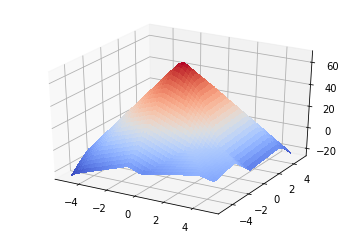

In [189]:
plot3d(X1, Y1, Zout)

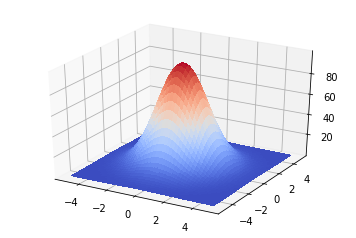

In [184]:
plot3d(X1, Y1, Z1)

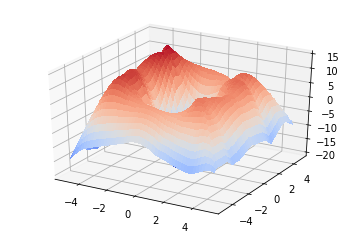

In [185]:
plot3d(X1, Y1, Zout-Z1)

# NN regression using dense layers

In [190]:
def model_fn_with_dense(features, labels, mode, params={}):
    p = params.get("p", 1)
    
    # b - batch size
    X = features['X'] # b x 1
    Y = features['Y'] # b x 1
    
    # labels -- b x 1
    
    inputs = tf.concat([X,Y], axis = 1) # b x 2
    
    out1 = tf.layers.dense(inputs=inputs, activation=tf.nn.relu, units=p)
    out2 = tf.layers.dense(inputs=out1, units=1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode = mode,
            predictions = out2,
            loss = None,
            train_op = None
        )
    loss = tf.losses.mean_squared_error(labels, out2)
    learning_rate = 1e-5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    global_step = tf.train.get_global_step()
    train_op = tf.group(optimizer, tf.assign_add(global_step, 1))
    return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = out2,
        loss = loss,
        train_op = train_op
    )

In [195]:
estimator = tf.estimator.Estimator(model_fn=model_fn_with_dense, params={"p": 10})

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x181af12550>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpG9NouS', '_save_summary_steps': 100}


In [196]:
estimator.train(input_fn=input_fn)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpG9NouS/model.ckpt.
INFO:tensorflow:loss = 345.961, step = 1
INFO:tensorflow:global_step/sec: 812.283
INFO:tensorflow:loss = 5.48656, step = 101 (0.126 sec)
INFO:tensorflow:global_step/sec: 1025.28
INFO:tensorflow:loss = 59.3375, step = 201 (0.099 sec)
INFO:tensorflow:global_step/sec: 993.435
INFO:tensorflow:loss = 69.9433, step = 301 (0.100 sec)
INFO:tensorflow:global_step/sec: 916.918
INFO:tensorflow:loss = 347.348, step = 401 (0.107 sec)
INFO:tensorflow:global_step/sec: 974.307
INFO:tensorflow:loss = 125.793, step = 501 (0.103 sec)
INFO:tensorflow:global_step/sec: 820.344
INFO:tensorflow:loss = 11.2254, step = 601 (0.122 sec)
INFO:tensorflow:global_step/sec: 900.738
INFO:tensorflow:loss = 720.948, step = 701 (0.111 sec)
INFO:tensorflow:global_step/sec: 877.741
INFO:tensorflow:loss = 1611.98, step = 801 (0.114 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 1127.74
INFO:tensorflow:loss = 422.6, step = 8401 (0.089 sec)
INFO:tensorflow:global_step/sec: 1157.14
INFO:tensorflow:loss = 235.069, step = 8501 (0.085 sec)
INFO:tensorflow:global_step/sec: 1188.85
INFO:tensorflow:loss = 17.0654, step = 8601 (0.084 sec)
INFO:tensorflow:global_step/sec: 1179.37
INFO:tensorflow:loss = 180.124, step = 8701 (0.085 sec)
INFO:tensorflow:global_step/sec: 1098.64
INFO:tensorflow:loss = 1099.57, step = 8801 (0.092 sec)
INFO:tensorflow:global_step/sec: 1158.73
INFO:tensorflow:loss = 48.6703, step = 8901 (0.086 sec)
INFO:tensorflow:global_step/sec: 1209.48
INFO:tensorflow:loss = 154.543, step = 9001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1184.22
INFO:tensorflow:loss = 94.4787, step = 9101 (0.085 sec)
INFO:tensorflow:global_step/sec: 1154.99
INFO:tensorflow:loss = 46.5213, step = 9201 (0.086 sec)
INFO:tensorflow:global_step/sec: 1158.92
INFO:tensorflow:loss = 3173.63, step = 9301 (0.086 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:global_step/sec: 1220.27
INFO:tensorflow:loss = 901.879, step = 16801 (0.080 sec)
INFO:tensorflow:global_step/sec: 1239.22
INFO:tensorflow:loss = 329.481, step = 16901 (0.081 sec)
INFO:tensorflow:global_step/sec: 1271.31
INFO:tensorflow:loss = 133.596, step = 17001 (0.079 sec)
INFO:tensorflow:global_step/sec: 1281.36
INFO:tensorflow:loss = 1404.53, step = 17101 (0.079 sec)
INFO:tensorflow:global_step/sec: 1234.19
INFO:tensorflow:loss = 249.231, step = 17201 (0.080 sec)
INFO:tensorflow:global_step/sec: 1086.45
INFO:tensorflow:loss = 707.892, step = 17301 (0.092 sec)
INFO:tensorflow:global_step/sec: 1193.13
INFO:tensorflow:loss = 93.7807, step = 17401 (0.084 sec)
INFO:tensorflow:global_step/sec: 1004.29
INFO:tensorflow:loss = 562.947, step = 17501 (0.100 sec)
INFO:tensorflow:global_step/sec: 1027.4
INFO:tensorflow:loss = 137.191, step = 17601 (0.099 sec)
INFO:tensorflow:global_step/sec: 979.403
INFO:tensorflow:loss = 480.946, step = 17701 (0.101 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 1198.29
INFO:tensorflow:loss = 509.183, step = 25201 (0.083 sec)
INFO:tensorflow:global_step/sec: 1259.78
INFO:tensorflow:loss = 718.013, step = 25301 (0.079 sec)
INFO:tensorflow:global_step/sec: 1281.85
INFO:tensorflow:loss = 1617.11, step = 25401 (0.079 sec)
INFO:tensorflow:global_step/sec: 1187.83
INFO:tensorflow:loss = 75.059, step = 25501 (0.084 sec)
INFO:tensorflow:global_step/sec: 1219.27
INFO:tensorflow:loss = 909.067, step = 25601 (0.081 sec)
INFO:tensorflow:global_step/sec: 1278.3
INFO:tensorflow:loss = 41.1577, step = 25701 (0.079 sec)
INFO:tensorflow:global_step/sec: 948.946
INFO:tensorflow:loss = 652.527, step = 25801 (0.105 sec)
INFO:tensorflow:global_step/sec: 1218.35
INFO:tensorflow:loss = 816.009, step = 25901 (0.081 sec)
INFO:tensorflow:global_step/sec: 1205.55
INFO:tensorflow:loss = 63.145, step = 26001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1251.44
INFO:tensorflow:loss = 42.4621, step = 26101 (0.080 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 1142.58
INFO:tensorflow:loss = 30.5416, step = 33601 (0.087 sec)
INFO:tensorflow:global_step/sec: 1197.33
INFO:tensorflow:loss = 24.4668, step = 33701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1208.75
INFO:tensorflow:loss = 248.52, step = 33801 (0.083 sec)
INFO:tensorflow:global_step/sec: 993.365
INFO:tensorflow:loss = 91.5725, step = 33901 (0.101 sec)
INFO:tensorflow:global_step/sec: 1212.06
INFO:tensorflow:loss = 162.606, step = 34001 (0.083 sec)
INFO:tensorflow:global_step/sec: 1168.81
INFO:tensorflow:loss = 41.2866, step = 34101 (0.086 sec)
INFO:tensorflow:global_step/sec: 1226.18
INFO:tensorflow:loss = 48.9168, step = 34201 (0.081 sec)
INFO:tensorflow:global_step/sec: 1226.16
INFO:tensorflow:loss = 311.017, step = 34301 (0.082 sec)
INFO:tensorflow:global_step/sec: 1174.44
INFO:tensorflow:loss = 64.1683, step = 34401 (0.085 sec)
INFO:tensorflow:global_step/sec: 1220.92
INFO:tensorflow:loss = 371.566, step = 34501 (0.082 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 1154.2
INFO:tensorflow:loss = 43.0038, step = 42001 (0.087 sec)
INFO:tensorflow:global_step/sec: 1113.82
INFO:tensorflow:loss = 20.0146, step = 42101 (0.089 sec)
INFO:tensorflow:global_step/sec: 1154.45
INFO:tensorflow:loss = 82.4205, step = 42201 (0.087 sec)
INFO:tensorflow:global_step/sec: 1153.54
INFO:tensorflow:loss = 313.132, step = 42301 (0.087 sec)
INFO:tensorflow:global_step/sec: 1038.69
INFO:tensorflow:loss = 291.743, step = 42401 (0.096 sec)
INFO:tensorflow:global_step/sec: 1225.82
INFO:tensorflow:loss = 53.2773, step = 42501 (0.082 sec)
INFO:tensorflow:global_step/sec: 1224.12
INFO:tensorflow:loss = 340.496, step = 42601 (0.082 sec)
INFO:tensorflow:global_step/sec: 1194.5
INFO:tensorflow:loss = 39.3201, step = 42701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1218.73
INFO:tensorflow:loss = 288.628, step = 42801 (0.081 sec)
INFO:tensorflow:global_step/sec: 1211.18
INFO:tensorflow:loss = 82.9903, step = 42901 (0.082 sec)
INFO:tensorflow:global

In [197]:
Zgen = estimator.predict(input_fn=predict_input_fn)
Zout = np.array([i[0] for i in Zgen]).reshape(-1,1)
estimator.evaluate(input_fn=predict_input_fn)

INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpG9NouS/model.ckpt-50001
INFO:tensorflow:Starting evaluation at 2018-01-22-09:38:40
INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpG9NouS/model.ckpt-50001
INFO:tensorflow:Finished evaluation at 2018-01-22-09:38:40
INFO:tensorflow:Saving dict for global step 50001: global_step = 50001, loss = 104.484


{'global_step': 50001, 'loss': 104.48377}

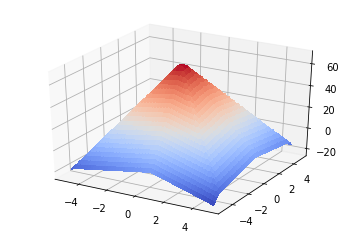

In [198]:
plot3d(X1, Y1, Zout)

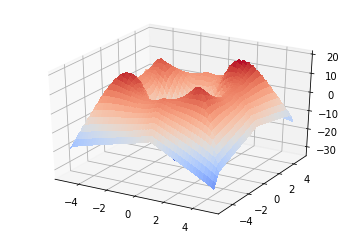

In [199]:
plot3d(X1, Y1, Zout - Z1)

## NN 2 layer

In [214]:
def model_fn_with_dense_2(features, labels, mode, params={}):
    p = params.get("p", 1)
    
    # b - batch size
    X = features['X'] # b x 1
    Y = features['Y'] # b x 1
    
    # labels -- b x 1
    
    inputs = tf.concat([X,Y], axis = 1) # b x 2
    
    out1 = tf.layers.dense(inputs=inputs, activation=tf.nn.relu, units=p)
    out2 = tf.layers.dense(inputs=out1, units=p, activation=tf.nn.relu)
    out3 = tf.layers.dense(inputs=out2, units=1)
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(
            mode = mode,
            predictions = out3,
            loss = None,
            train_op = None
        )
    loss = tf.losses.mean_squared_error(labels, out3)
    learning_rate = 1e-5
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    global_step = tf.train.get_global_step()
    train_op = tf.group(optimizer, tf.assign_add(global_step, 1))
    return tf.estimator.EstimatorSpec(
        mode = mode,
        predictions = out3,
        loss = loss,
        train_op = train_op
    )

In [215]:
estimator = tf.estimator.Estimator(model_fn=model_fn_with_dense, params={"p": 10})
input_fn = tf.estimator.inputs.numpy_input_fn({"X": X1, "Y":Y1}, y=Z1, batch_size=5, num_epochs=100, shuffle=True)
estimator.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1819624290>, '_save_checkpoints_steps': None, '_keep_checkpoint_every_n_hours': 10000, '_service': None, '_num_ps_replicas': 0, '_tf_random_seed': None, '_master': '', '_num_worker_replicas': 1, '_task_id': 0, '_log_step_count_steps': 100, '_model_dir': '/var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpKkPN76', '_save_summary_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpKkPN76/model.ckpt.
INFO:tensorflow:loss = 8.97861, step = 1
INFO:tensorflow:global_step/sec: 910.904
INFO:tensorflow:loss = 28.8607, step = 101 (0.112 sec)
INFO:tensorflow:global_step/sec: 1104.5
INFO:tensorflow:loss = 871.953, step = 201 

INFO:tensorflow:loss = 741.518, step = 7601 (0.085 sec)
INFO:tensorflow:global_step/sec: 1239.88
INFO:tensorflow:loss = 1108.51, step = 7701 (0.080 sec)
INFO:tensorflow:global_step/sec: 1135.14
INFO:tensorflow:loss = 259.871, step = 7801 (0.088 sec)
INFO:tensorflow:global_step/sec: 1274.48
INFO:tensorflow:loss = 49.3873, step = 7901 (0.079 sec)
INFO:tensorflow:global_step/sec: 1307.11
INFO:tensorflow:loss = 271.444, step = 8001 (0.076 sec)
INFO:tensorflow:global_step/sec: 1316.03
INFO:tensorflow:loss = 856.351, step = 8101 (0.076 sec)
INFO:tensorflow:global_step/sec: 1259.98
INFO:tensorflow:loss = 1167.83, step = 8201 (0.079 sec)
INFO:tensorflow:global_step/sec: 1262.25
INFO:tensorflow:loss = 977.415, step = 8301 (0.079 sec)
INFO:tensorflow:global_step/sec: 1257.01
INFO:tensorflow:loss = 480.869, step = 8401 (0.079 sec)
INFO:tensorflow:global_step/sec: 1215.01
INFO:tensorflow:loss = 231.777, step = 8501 (0.082 sec)
INFO:tensorflow:global_step/sec: 1267.51
INFO:tensorflow:loss = 932.659

INFO:tensorflow:global_step/sec: 1279.98
INFO:tensorflow:loss = 90.5658, step = 16101 (0.077 sec)
INFO:tensorflow:global_step/sec: 1335.94
INFO:tensorflow:loss = 1162.27, step = 16201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1322.56
INFO:tensorflow:loss = 53.2257, step = 16301 (0.076 sec)
INFO:tensorflow:global_step/sec: 1335.37
INFO:tensorflow:loss = 78.7588, step = 16401 (0.075 sec)
INFO:tensorflow:global_step/sec: 1300.37
INFO:tensorflow:loss = 72.141, step = 16501 (0.077 sec)
INFO:tensorflow:global_step/sec: 1348.72
INFO:tensorflow:loss = 101.837, step = 16601 (0.074 sec)
INFO:tensorflow:global_step/sec: 1316.52
INFO:tensorflow:loss = 2373.19, step = 16701 (0.076 sec)
INFO:tensorflow:global_step/sec: 1344.74
INFO:tensorflow:loss = 202.935, step = 16801 (0.074 sec)
INFO:tensorflow:global_step/sec: 1254.36
INFO:tensorflow:loss = 1386.81, step = 16901 (0.080 sec)
INFO:tensorflow:global_step/sec: 1319.08
INFO:tensorflow:loss = 1036.88, step = 17001 (0.076 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 1281.8
INFO:tensorflow:loss = 25.7389, step = 24501 (0.077 sec)
INFO:tensorflow:global_step/sec: 1267.06
INFO:tensorflow:loss = 159.668, step = 24601 (0.079 sec)
INFO:tensorflow:global_step/sec: 1331.08
INFO:tensorflow:loss = 832.085, step = 24701 (0.075 sec)
INFO:tensorflow:global_step/sec: 1331.18
INFO:tensorflow:loss = 202.194, step = 24801 (0.075 sec)
INFO:tensorflow:global_step/sec: 1313.54
INFO:tensorflow:loss = 451.646, step = 24901 (0.076 sec)
INFO:tensorflow:global_step/sec: 1293.73
INFO:tensorflow:loss = 238.979, step = 25001 (0.077 sec)
INFO:tensorflow:global_step/sec: 1342.59
INFO:tensorflow:loss = 344.125, step = 25101 (0.075 sec)
INFO:tensorflow:global_step/sec: 1322.98
INFO:tensorflow:loss = 53.6851, step = 25201 (0.076 sec)
INFO:tensorflow:global_step/sec: 1188.61
INFO:tensorflow:loss = 143.827, step = 25301 (0.084 sec)
INFO:tensorflow:global_step/sec: 1282.43
INFO:tensorflow:loss = 57.868, step = 25401 (0.078 sec)
INFO:tensorflow:global

INFO:tensorflow:global_step/sec: 1277.89
INFO:tensorflow:loss = 42.3812, step = 32901 (0.078 sec)
INFO:tensorflow:global_step/sec: 1316.79
INFO:tensorflow:loss = 47.1224, step = 33001 (0.076 sec)
INFO:tensorflow:global_step/sec: 1347.64
INFO:tensorflow:loss = 14.421, step = 33101 (0.074 sec)
INFO:tensorflow:global_step/sec: 1337.33
INFO:tensorflow:loss = 178.493, step = 33201 (0.075 sec)
INFO:tensorflow:global_step/sec: 1327.05
INFO:tensorflow:loss = 49.8718, step = 33301 (0.075 sec)
INFO:tensorflow:global_step/sec: 1330.74
INFO:tensorflow:loss = 24.2809, step = 33401 (0.075 sec)
INFO:tensorflow:global_step/sec: 1268.04
INFO:tensorflow:loss = 27.0971, step = 33501 (0.079 sec)
INFO:tensorflow:global_step/sec: 1261.65
INFO:tensorflow:loss = 86.5233, step = 33601 (0.079 sec)
INFO:tensorflow:global_step/sec: 1202.62
INFO:tensorflow:loss = 19.9984, step = 33701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1164.02
INFO:tensorflow:loss = 108.171, step = 33801 (0.086 sec)
INFO:tensorflow:globa

INFO:tensorflow:global_step/sec: 1296.83
INFO:tensorflow:loss = 76.9367, step = 41301 (0.077 sec)
INFO:tensorflow:global_step/sec: 1337.7
INFO:tensorflow:loss = 57.5208, step = 41401 (0.075 sec)
INFO:tensorflow:global_step/sec: 1324.05
INFO:tensorflow:loss = 358.609, step = 41501 (0.076 sec)
INFO:tensorflow:global_step/sec: 1308.73
INFO:tensorflow:loss = 28.7528, step = 41601 (0.076 sec)
INFO:tensorflow:global_step/sec: 1334.4
INFO:tensorflow:loss = 34.5844, step = 41701 (0.075 sec)
INFO:tensorflow:global_step/sec: 1329.86
INFO:tensorflow:loss = 53.2049, step = 41801 (0.075 sec)
INFO:tensorflow:global_step/sec: 1336.86
INFO:tensorflow:loss = 57.3433, step = 41901 (0.075 sec)
INFO:tensorflow:global_step/sec: 1340.72
INFO:tensorflow:loss = 11.9147, step = 42001 (0.075 sec)
INFO:tensorflow:global_step/sec: 1299.75
INFO:tensorflow:loss = 46.749, step = 42101 (0.077 sec)
INFO:tensorflow:global_step/sec: 1340.36
INFO:tensorflow:loss = 272.566, step = 42201 (0.075 sec)
INFO:tensorflow:global_

INFO:tensorflow:global_step/sec: 1216.35
INFO:tensorflow:loss = 195.282, step = 49701 (0.082 sec)
INFO:tensorflow:global_step/sec: 1212.03
INFO:tensorflow:loss = 75.8215, step = 49801 (0.082 sec)
INFO:tensorflow:global_step/sec: 1733.2
INFO:tensorflow:loss = 45.0878, step = 49901 (0.058 sec)
INFO:tensorflow:Saving checkpoints for 50001 into /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpKkPN76/model.ckpt.
INFO:tensorflow:Loss for final step: 160.649.


In [216]:
Zgen = estimator.predict(input_fn=predict_input_fn)
Zout = np.array([i[0] for i in Zgen]).reshape(-1,1)
estimator.evaluate(input_fn=predict_input_fn)

INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpKkPN76/model.ckpt-50001
INFO:tensorflow:Starting evaluation at 2018-01-22-10:18:11
INFO:tensorflow:Restoring parameters from /var/folders/_n/7gq_v92s6xq549134xk8hyts_mxyxb/T/tmpKkPN76/model.ckpt-50001
INFO:tensorflow:Finished evaluation at 2018-01-22-10:18:11
INFO:tensorflow:Saving dict for global step 50001: global_step = 50001, loss = 99.4771


{'global_step': 50001, 'loss': 99.477058}

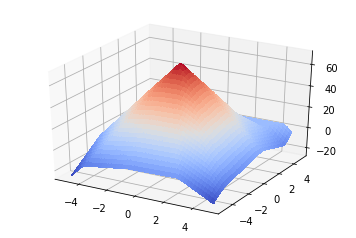

In [217]:
plot3d(X1, Y1, Zout)

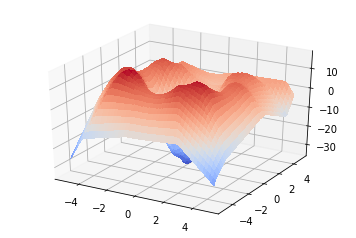

In [218]:
plot3d(X1, Y1, Zout - Z1)